# Simulating and visualising trajectories

In this chapter, we will discuss how to simulate and visualise a dynamical system. Before we dicuss how to implement specific dynamical systems, we will use a pre-existing implementation of the simple harmonic oscillator in `hdynamics/dynamics/harmonic_oscillator.py` to discuss how we can simulate and plot dynamical systems in our framework. In the next chapters, we will discuss how to implement a new dynamical system from scratch.

## Step 1. Importing a system

First, we can import the `HarmonicOscillator` system defined in the `hdynamics/dynamics/harmonic_oscillator.py` and create a dynamical system object `harmonic_oscillator` as follows:

In [25]:
from hdynamics.dynamics.harmonic_oscillator import HarmonicOscillator

harmonic_oscillator = HarmonicOscillator()

## Step 2. Randomly sample initial condition

We can create an initial condition by first creating a JAX random seed `key` and passing it to the dynamical system by running,

In [26]:
import jax.numpy as jnp
x = jnp.array([[1.0], [0.0]])

print("Shape of initial condition: ", x.shape)

Shape of initial condition:  (2, 1)


## Step 3. Use JAX autodiff to obtain symplectic form

Thanks to auto differentiation in JAX, we can obtain the gradient of the Hamiltonian `harmonic_oscillator.H()` using the `jax.grad` function and pass it to the `symplectic_form` defined in `utils.py` (please have a look!):

In [20]:
from hdynamics.utils import symplectic_form

jac_h = jax.grad(lambda x: harmonic_oscillator.H(x, eps=0))

grad_x = lambda x, t: symplectic_form(jac_h(x))

In [21]:
x_flat = x.reshape(-1)
print(x_flat)

[1. 0.]


## Step 4. Generate trajectory

Next, we can generate a trajectory by by passing the initial condition and the found trajectory gradient to ordinary differential equation solver `ode_int`:

In [22]:
import jax.numpy as jnp

from hdynamics.odeint import ode_int

def generate_trajectory(grad_x, x_start, stepsize=0.04, n_steps=100):
    t_start = 0.0
    t_end = n_steps * stepsize

    t_span = jnp.linspace(t_start, t_end, n_steps + 1)

    solution = ode_int(grad_x, x_start, t_span)

    return solution, t_span

In [23]:
trajectory, t_span = generate_trajectory(grad_x, x_flat)
print('trajectory:', trajectory.shape)

trajectory: (101, 2)


## Step 5. Plotting trajectory

Lastly, we can plot the trajectory of the dynamical system by calling the `plot_trajectory()` function and passing a matplotlib figure:

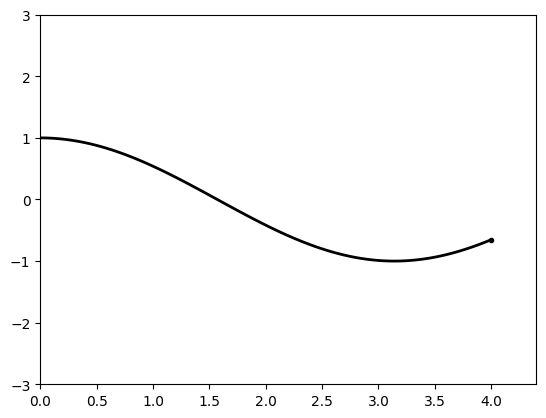

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

harmonic_oscillator.plot_trajectory(trajectory, t_span, ax)

## We did it!

Great, we did it! We obtain a sinusoidal wave, the correct solution to the harmonic oscillator.